In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv("house_price.csv")

In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.Collecting scipy
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.8/41.0 MB 2.5 MB/s eta 0:00:16
   - -------------------------------------- 1.3/41.0 MB 2.6 MB/s eta 0:00:16
   -- ------------------------------------- 2.1/41.0 MB 2.7 MB/s eta 0:00:15
   -- ------------------------------------- 2.9/41.0 MB 3.1 MB/s eta 0:00:13
   ---- ----------------------------------- 4.2/41.0 MB 3.6 MB/s eta 0:00:11
   ----- ---------------------------------- 5.5/41.0 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.8/41.0 MB 4.3 MB/s eta 0:00:09
   ------- -------------------------------- 8.1/41.0 MB 4.5 MB/s eta 0:00:08
   -------- ------------------------------- 9.2/41.0 MB 4.5 MB/s eta 0:00:08
   ---------- ----------------------------- 10.7/41.0 MB 4.8 MB/s eta 0:00:07
   ----


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

In [14]:


data = pd.read_csv("house_price.csv")
df = pd.DataFrame(data)

In [15]:

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [16]:
print(df["location"].nunique(), "unique locations")
print(df["size"].nunique(), "unique sizes")

241 unique locations
31 unique sizes


In [17]:
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [18]:
mean_price_per_sqft = df["price_per_sqft"].mean()
std_price_per_sqft = df["price_per_sqft"].std()

lower_limit = mean_price_per_sqft - (2 * std_price_per_sqft)
upper_limit = mean_price_per_sqft + (2 * std_price_per_sqft)

outliers_mean_std = df[(df["price_per_sqft"] < lower_limit) | (df["price_per_sqft"] > upper_limit)]
print(f"Outliers detected (Mean-Std): {outliers_mean_std.shape[0]}")

Outliers detected (Mean-Std): 5


In [19]:
q1 = np.percentile(df["price_per_sqft"], 25)
q3 = np.percentile(df["price_per_sqft"], 75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers_percentile = df[(df["price_per_sqft"] < lower_bound) | (df["price_per_sqft"] > upper_bound)]
print(f"Outliers detected (Percentile): {outliers_percentile.shape[0]}")

Outliers detected (Percentile): 1265


In [20]:
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df["price_per_sqft"] < lower_bound_iqr) | (df["price_per_sqft"] > upper_bound_iqr)]
print(f"Outliers detected (IQR): {outliers_iqr.shape[0]}")

Outliers detected (IQR): 1265


In [21]:
df["z_score"] = zscore(df["price_per_sqft"])
outliers_z_score = df[(df["z_score"] < -2) | (df["z_score"] > 2)]
print(f"Outliers detected (Z-Score): {outliers_z_score.shape[0]}")

Outliers detected (Z-Score): 5


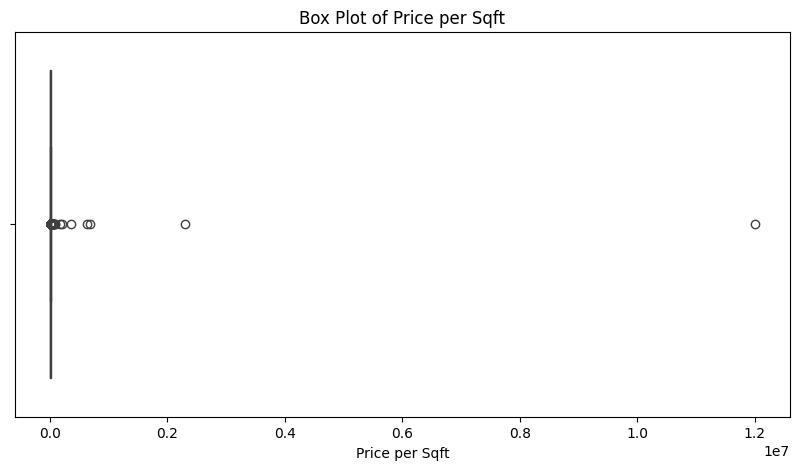

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price_per_sqft"])
plt.title("Box Plot of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.show()

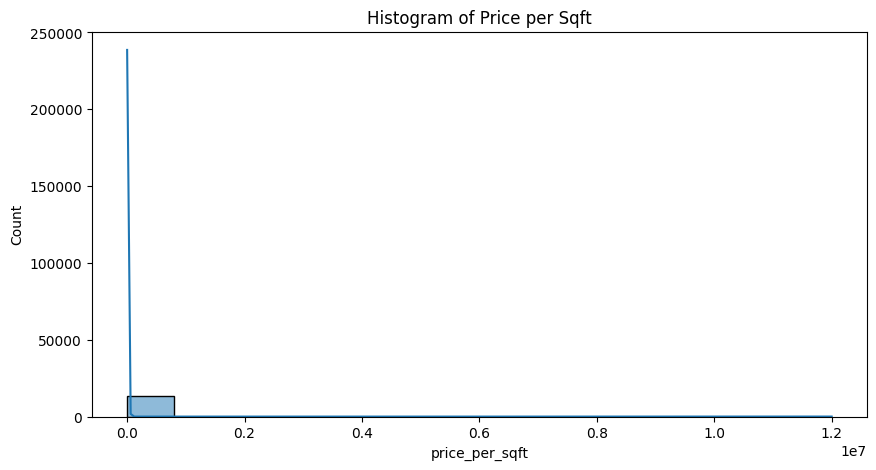

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price_per_sqft"], bins=15, kde=True)
plt.title("Histogram of Price per Sqft")
plt.show()

print("Skewness:", skew(df["price_per_sqft"]))
print("Kurtosis:", kurtosis(df["price_per_sqft"]))

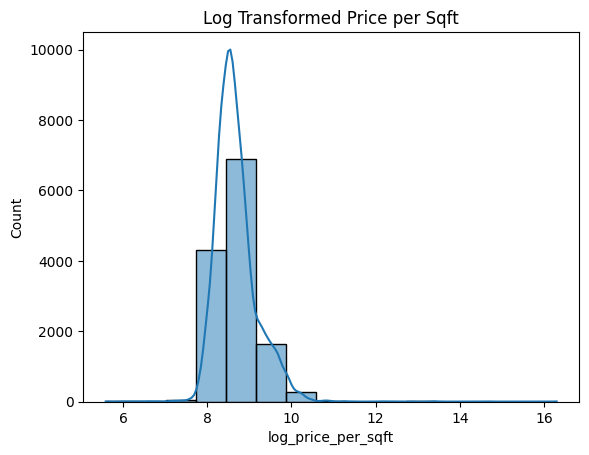

In [26]:
df["log_price_per_sqft"] = np.log(df["price_per_sqft"])
sns.histplot(df["log_price_per_sqft"], bins=15, kde=True)
plt.title("Log Transformed Price per Sqft")
plt.show()


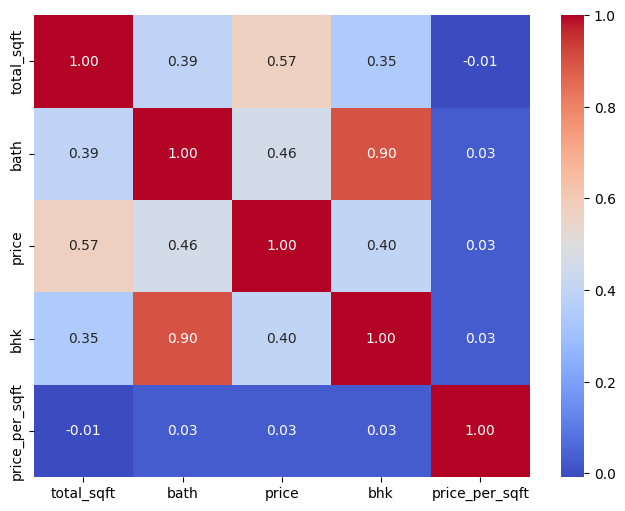

In [25]:
correlation_matrix = df[["total_sqft", "bath", "price", "bhk", "price_per_sqft"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

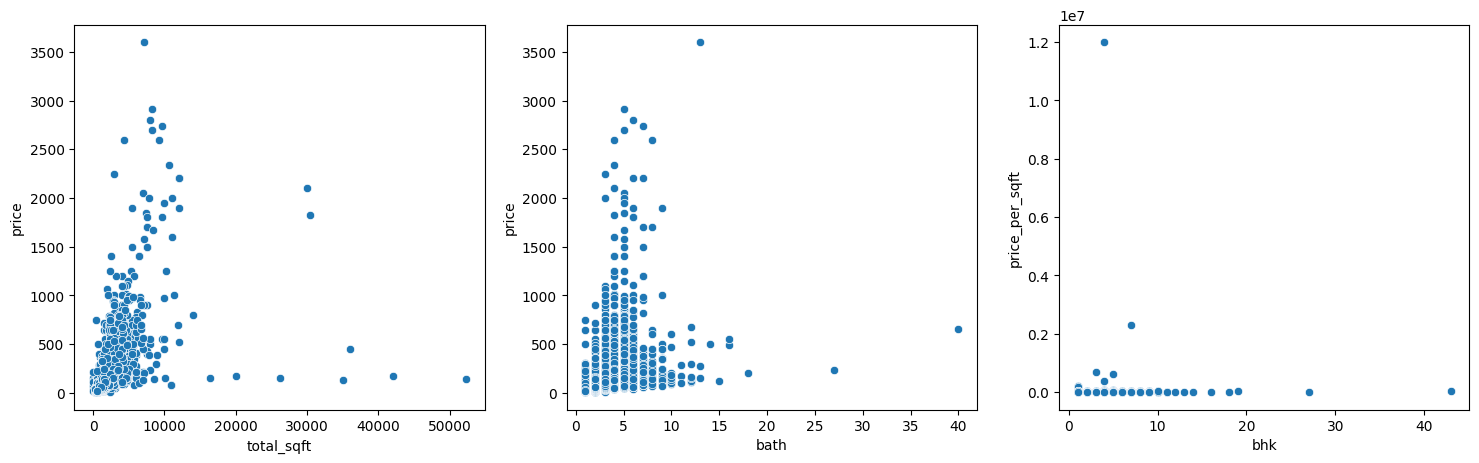

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x=df["total_sqft"], y=df["price"], ax=axes[0])
sns.scatterplot(x=df["bath"], y=df["price"], ax=axes[1])
sns.scatterplot(x=df["bhk"], y=df["price_per_sqft"], ax=axes[2])
plt.show()